# 探索性分析

## 导入模块

In [1]:
from load_data import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

## 加载数据

In [2]:
ijcai_18_train, ijcai_18_test = load_data()

### 数据基本信息

本数据集共有27个原始特征字段（含id和label），共496509条记录。其中包括：

- 训练集：478,138条记录
- 测试集：18,371条记录

(训练集包含分类标签：is_trade)
![](../etc/Inter_Ad_Algo.svg)
在分析时，将合并训练集和测试集，方便数据处理

In [3]:
ijcai_18_test['is_trade'] = -1 # test label 标注为-1，用以区分训练集和数据集
ijcai_18_merged = pd.concat([ijcai_18_train, ijcai_18_test], axis=0)
ijcai_18_merged.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [4]:
ijcai_18_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496509 entries, 0 to 18370
Data columns (total 27 columns):
instance_id                  496509 non-null int64
item_id                      496509 non-null int64
item_category_list           496509 non-null object
item_property_list           496509 non-null object
item_brand_id                496509 non-null int64
item_city_id                 496509 non-null int64
item_price_level             496509 non-null int64
item_sales_level             496509 non-null int64
item_collected_level         496509 non-null int64
item_pv_level                496509 non-null int64
user_id                      496509 non-null int64
user_gender_id               496509 non-null int64
user_age_level               496509 non-null int64
user_occupation_id           496509 non-null int64
user_star_level              496509 non-null int64
context_id                   496509 non-null int64
context_timestamp            496509 non-null int64
context_page_id      

可以看出，其中有部分数据格式存在问题，需要手工修改

In [5]:
remodified_rows = (
    ('instance_id', np.object),
    ('item_id', np.object),
    ('item_brand_id', np.object),
    ('item_city_id', np.object),
    ('user_id', np.object),
    ('user_gender_id', np.object),
    ('user_occupation_id', np.object),
    ('context_id', np.object),
    ('context_page_id', np.object),
    ('shop_id', np.object),
    ('is_trade', np.object),
)
for row, retype in remodified_rows:
    ijcai_18_merged[row] = ijcai_18_merged[row].astype(retype)

In [6]:
ijcai_18_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496509 entries, 0 to 18370
Data columns (total 27 columns):
instance_id                  496509 non-null object
item_id                      496509 non-null object
item_category_list           496509 non-null object
item_property_list           496509 non-null object
item_brand_id                496509 non-null object
item_city_id                 496509 non-null object
item_price_level             496509 non-null int64
item_sales_level             496509 non-null int64
item_collected_level         496509 non-null int64
item_pv_level                496509 non-null int64
user_id                      496509 non-null object
user_gender_id               496509 non-null object
user_age_level               496509 non-null int64
user_occupation_id           496509 non-null object
user_star_level              496509 non-null int64
context_id                   496509 non-null object
context_timestamp            496509 non-null int64
context_page_

In [7]:
ijcai_18_test = ijcai_18_merged[ijcai_18_merged.is_trade == -1]
ijcai_18_train = ijcai_18_merged[ijcai_18_merged.is_trade != -1]

## 字段分析
### 查看数据分布

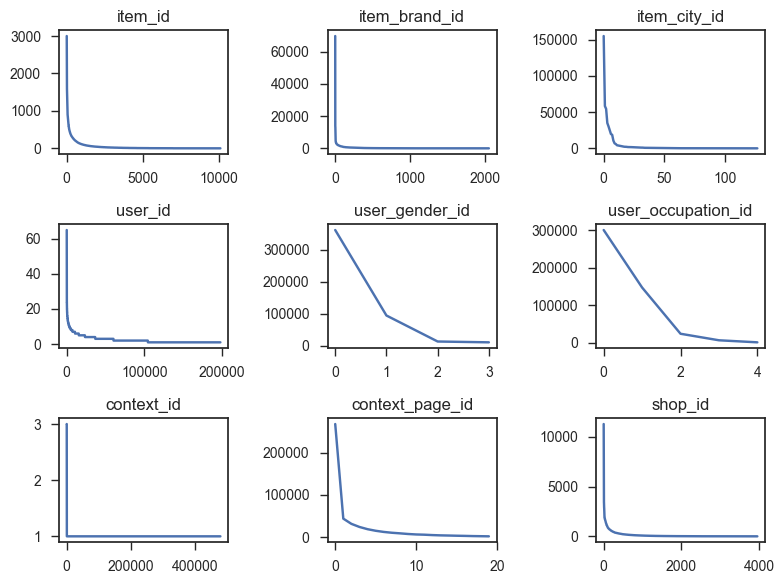

In [8]:
rows = (
    'item_id',
    'item_brand_id',
    'item_city_id',
    'user_id',
    'user_gender_id',
    'user_occupation_id',
    'context_id',
    'context_page_id',
    'shop_id'
)
plt.figure(figsize=(8,6),dpi=100)
for idx in range(len(rows)):
    plt.subplot(3, 3, idx + 1)
    plt.plot(ijcai_18_train[rows[idx]].value_counts().values)
    plt.title(rows[idx])
plt.tight_layout()
plt.show()

### 各特征详细分析
#### User_ID

In [9]:
user_id = ijcai_18_merged.groupby("user_id")

In [10]:
user_id.is_trade.count().describe()

count    207641.000000
mean          2.391190
std           2.364709
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          65.000000
Name: is_trade, dtype: float64

可以看出，75%的用户仅含有3条记录，因此舍弃本字段。

#### context_id

In [11]:
context_id = ijcai_18_merged.groupby("context_id")
context_id.is_trade.count().describe()

count    496482.000000
mean          1.000054
std           0.007902
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: is_trade, dtype: float64

和User_id一样，绝大多数的上下文仅出现过一次，删除

In [12]:
del ijcai_18_merged["context_id"]
del ijcai_18_merged["user_id"]

#### item_id

In [13]:
item_id = ijcai_18_merged.groupby("item_id")
item_id.is_trade.count().describe()

count    10236.000000
mean        48.506155
std        149.957748
min          1.000000
25%          2.000000
50%          7.000000
75%         30.000000
max       3123.000000
Name: is_trade, dtype: float64

item_id重复频率较多，先做保留

#### shop_id

In [14]:
shop_id = ijcai_18_merged.groupby("shop_id")
shop_id.is_trade.count().describe()

count     4003.000000
mean       124.034224
std        423.881713
min          1.000000
25%          4.000000
50%         16.000000
75%         81.000000
max      11767.000000
Name: is_trade, dtype: float64

同item_id，保留该字段

In [15]:
ijcai_18_test = ijcai_18_merged[ijcai_18_merged.is_trade == -1]
ijcai_18_train = ijcai_18_merged[ijcai_18_merged.is_trade != -1]

### 用户信息分析

#### 用户性别信息
用户的预测性别分为4种
- 女性
- 男性
- 家庭用户
- 缺失

对此，本字段使用one-hot编码进行类型拆分

In [16]:
gender = pd.get_dummies(ijcai_18_merged.user_gender_id, prefix= 'user_gender_id')
ijcai_18_merged = pd.concat([ijcai_18_merged, gender], axis=1)
del ijcai_18_merged['user_gender_id']

#### 用户年龄

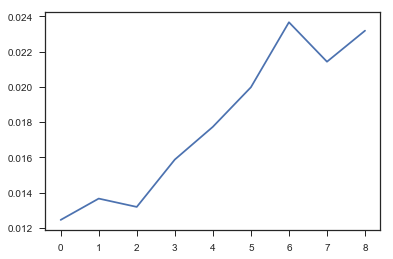

In [17]:
fig = plt.figure()

trade_age_lvl = ijcai_18_train[ijcai_18_train.is_trade == 1].user_age_level.value_counts()
age_lvl = ijcai_18_train.user_age_level.value_counts()

df = trade_age_lvl / age_lvl
plt.plot(df.values)
plt.show()

In [18]:
df = ijcai_18_merged.user_age_level
df = (df - df.min()) / (df.max() - df.min())
ijcai_18_merged.user_age_level = df

#### 预测职业编号

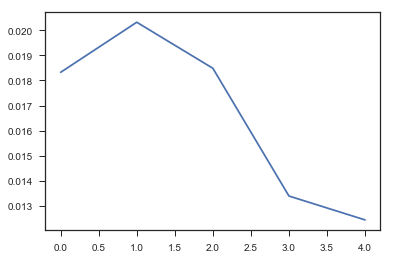

In [19]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].user_occupation_id.value_counts()
tot = ijcai_18_train.user_occupation_id.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

In [20]:
occupation = pd.get_dummies(ijcai_18_merged.user_occupation_id, prefix= 'user_occupation_id')
ijcai_18_merged = pd.concat([ijcai_18_merged, occupation], axis=1)
del ijcai_18_merged['user_occupation_id']

#### 用户星级编号

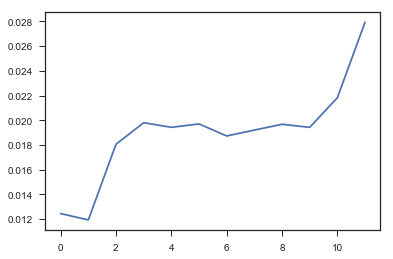

In [21]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].user_star_level.value_counts()
tot = ijcai_18_train.user_star_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

In [22]:
user_star_level = pd.get_dummies(ijcai_18_merged.user_star_level, prefix= 'user_star_level')
ijcai_18_merged = pd.concat([ijcai_18_merged, user_star_level], axis=1)
del ijcai_18_merged['user_star_level']

### 商户

#### 好评数量等级

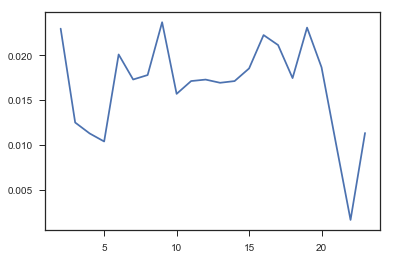

In [23]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].shop_review_num_level.value_counts()
tot = ijcai_18_train.shop_review_num_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

In [24]:
shop_review_num_level = pd.get_dummies(ijcai_18_merged.shop_review_num_level, prefix= 'shop_review_num_level')
ijcai_18_merged = pd.concat([ijcai_18_merged, shop_review_num_level], axis=1)
del ijcai_18_merged['shop_review_num_level']

#### 星级编号

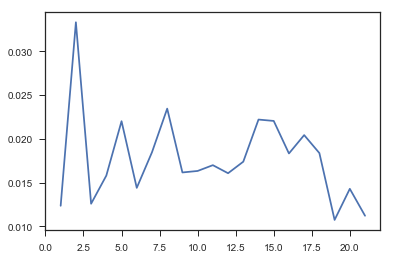

In [25]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].shop_star_level.value_counts()
tot = ijcai_18_train.shop_star_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

In [26]:
shop_star_level = pd.get_dummies(ijcai_18_merged.shop_star_level, prefix= 'shop_star_level')
ijcai_18_merged = pd.concat([ijcai_18_merged, shop_star_level], axis=1)
del ijcai_18_merged['shop_star_level']

### 上下文信息

#### 展示页面编号

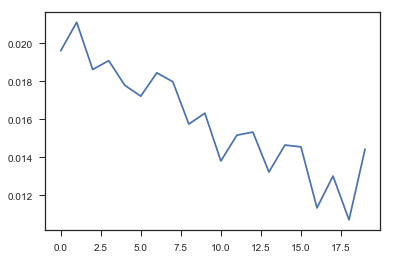

In [30]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].context_page_id.value_counts()
tot = ijcai_18_train.context_page_id.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

In [31]:
df = ijcai_18_merged.context_page_id
df = (df - df.min()) / (df.max() - df.min())
ijcai_18_merged.context_page_id = df

#### 广告商品编号

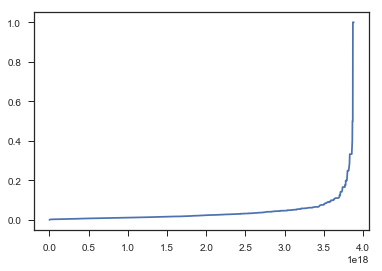

In [32]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_brand_id.value_counts()
tot = ijcai_18_train.item_brand_id.value_counts()

df = trade / tot
df.values.sort()
plt.plot(df)
plt.show()

#### 城市编号

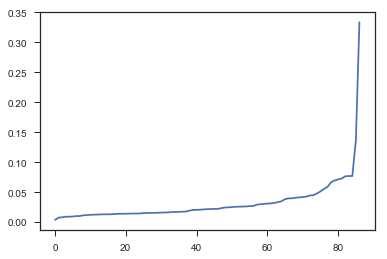

In [51]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_city_id.value_counts()
tot = ijcai_18_train.item_city_id.value_counts()

df = trade / tot
df.values.sort()
plt.plot(df.values)
plt.show()

In [34]:
item_city_id = pd.get_dummies(ijcai_18_merged.item_city_id, prefix= 'item_city_id')
ijcai_18_merged = pd.concat([ijcai_18_merged, item_city_id], axis=1)
del ijcai_18_merged['item_city_id']

#### 价格等级

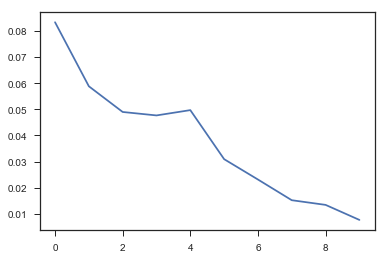

In [49]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_price_level.value_counts()
tot = ijcai_18_train.item_price_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

In [36]:
df = ijcai_18_merged.item_price_level
df = (df - df.min()) / (df.max() - df.min())
ijcai_18_merged.item_price_level = df

#### 销量等级

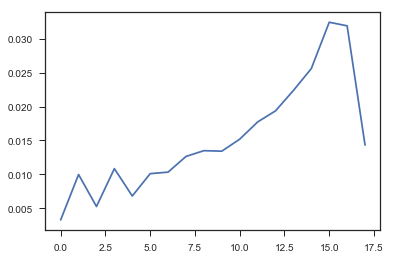

In [48]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_sales_level.value_counts()
tot = ijcai_18_train.item_sales_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

In [38]:
df = ijcai_18_merged.item_sales_level
df = (df - df.min()) / (df.max() - df.min())
ijcai_18_merged.item_sales_level = df

#### 收藏次数等级

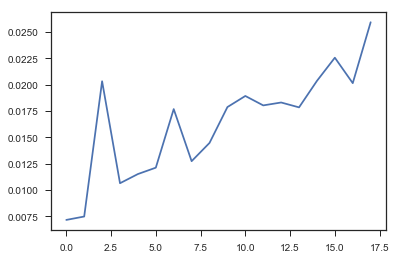

In [47]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_collected_level.value_counts()
tot = ijcai_18_train.item_collected_level.value_counts()

df = trade / tot
plt.plot(df.values)
plt.show()

In [40]:
df = ijcai_18_merged.item_collected_level
df = (df - df.min()) / (df.max() - df.min())
ijcai_18_merged.item_collected_level = df

#### 展示次数等级

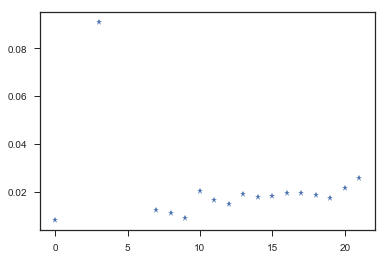

In [56]:
fig = plt.figure()

trade = ijcai_18_train[ijcai_18_train.is_trade == 1].item_pv_level.value_counts()
tot = ijcai_18_train.item_pv_level.value_counts()

df = trade / tot
plt.plot(df, '*')
plt.show()

In [57]:
df = ijcai_18_merged.item_pv_level
df = (df - df.min()) / (df.max() - df.min())
ijcai_18_merged.item_pv_level = df